Data untuk provinsi Gorontalo sebelum diproses:
      provinsi   jumlah  tahun
28   Gorontalo  447.000   2022
63   Gorontalo    0.000   2021
98   Gorontalo  978.000   2020
133  Gorontalo    1.178   2019
168  Gorontalo  981.000   2018
203  Gorontalo  981.000   2017
238  Gorontalo  714.000   2016
273  Gorontalo  714.000   2015

TimeSeries untuk provinsi Gorontalo sebelum diproses:
2022    447.000
2021      0.000
2020    978.000
2019      1.178
2018    981.000
2017    981.000
2016    714.000
2015    714.000
dtype: float64


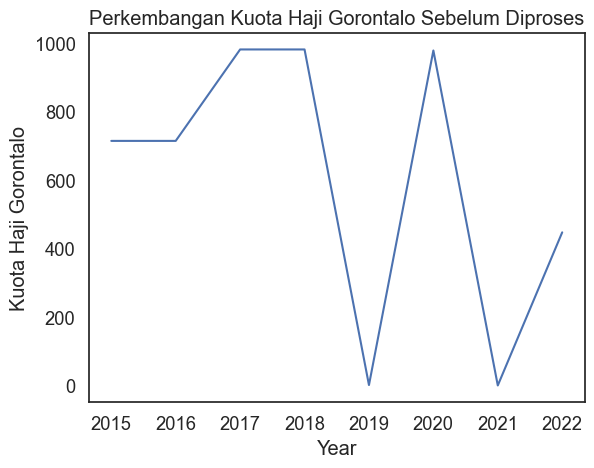

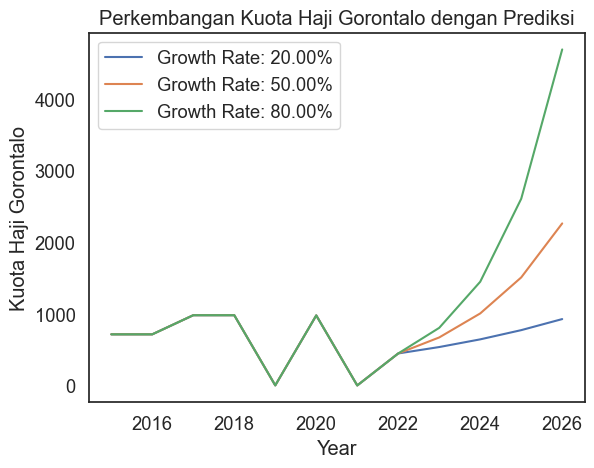

Hasil prediksi untuk provinsi Gorontalo
Growth Rate: 20.00%, Prediksi Kuota Tahun 2027: 1112.279
Growth Rate: 20.00%, Prediksi Kuota Tahun 2028: 1334.735
Growth Rate: 20.00%, Prediksi Kuota Tahun 2029: 1601.682
Growth Rate: 20.00%, Prediksi Kuota Tahun 2030: 1922.018
Growth Rate: 20.00%, Prediksi Kuota Tahun 2031: 2306.422
Growth Rate: 50.00%, Prediksi Kuota Tahun 2027: 3394.406
Growth Rate: 50.00%, Prediksi Kuota Tahun 2028: 5091.609
Growth Rate: 50.00%, Prediksi Kuota Tahun 2029: 7637.414
Growth Rate: 50.00%, Prediksi Kuota Tahun 2030: 11456.121
Growth Rate: 50.00%, Prediksi Kuota Tahun 2031: 17184.182
Growth Rate: 80.00%, Prediksi Kuota Tahun 2027: 8446.369
Growth Rate: 80.00%, Prediksi Kuota Tahun 2028: 15203.464
Growth Rate: 80.00%, Prediksi Kuota Tahun 2029: 27366.235
Growth Rate: 80.00%, Prediksi Kuota Tahun 2030: 49259.224
Growth Rate: 80.00%, Prediksi Kuota Tahun 2031: 88666.603

Growth rate terdekat dengan data aktual adalah 20.00%
Selisih antara prediksi akhir dan data aktua

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from modsim import *

# Membaca data
data = pd.read_csv("Perkembangan Kuota Jemaah Haji Menurut Provinsi.csv")

# Fungsi untuk membuat TimeSeries dari data yang belum diproses
def make_time_series(data):
    time_series = TimeSeries()
    for index, row in data.iterrows():
        year = row['tahun']
        jumlah = row['jumlah']
        time_series[year] = jumlah
    return time_series

# Fungsi untuk filter data berdasarkan provinsi
def filter_data_by_province(data, province):
    return data[data['provinsi'] == province]

# Input dari pengguna untuk provinsi
province = input("Masukkan nama provinsi: ")

# Fungsi untuk filter data berdasarkan provinsi
data_provinsi = filter_data_by_province(data, province)

# Cetak data provinsi sebelum diproses
print("Data untuk provinsi", province, "sebelum diproses:")
print(data_provinsi)

# Buat TimeSeries dari data yang belum diproses
time_series_provinsi = make_time_series(data_provinsi)

# Cetak TimeSeries yang dibuat
print("\nTimeSeries untuk provinsi", province, "sebelum diproses:")
print(time_series_provinsi)

# Plot TimeSeries
plt.plot(time_series_provinsi)
plt.xlabel('Year')
plt.ylabel(f'Kuota Haji {province}')
plt.title(f'Perkembangan Kuota Haji {province} Sebelum Diproses')
plt.show()

# Menginisialisasi System
def make_system(data, growth_rate, pred_years):
    initial_year = data['tahun'].min()
    final_year = data['tahun'].max() + pred_years
    provinsi = data['provinsi'].unique()[0]
    
    return System(initial_year=initial_year,
                  final_year=final_year,
                  provinsi=provinsi,
                  growth_rate=growth_rate)

# Membuat State awal
def make_initial_state(system, data):
    initial_kuota = data[data['tahun'] == system.initial_year]['jumlah'].sum()
    return State(year=system.initial_year, kuota=initial_kuota)

# Update function untuk State
def update_state(state, system, t, data):
    current_year = int(t)
    yearly_data = data[data['tahun'] == current_year]
    
    if not yearly_data.empty:
        kuota = yearly_data['jumlah'].sum()
    else:
        if current_year <= system.final_year:
            kuota = state.kuota * (1 + system.growth_rate)
        else:
            return None  # Mengembalikan None untuk menandakan akhir iterasi
    
    return State(year=current_year, kuota=kuota)

# Membuat Timeseries
def run_simulation(system, initial_state, data):
    t_array = linrange(system.initial_year, system.final_year)
    results = TimeSeries()
    
    state = initial_state
    for t in t_array:
        state = update_state(state, system, t, data)
        if state is None:
            break  # Berhenti iterasi jika mencapai tahun terakhir yang diprediksi
        results[t] = state.kuota
    
    return results

# SweepSeries untuk mensimulasikan berbagai growth_rate
def simulate_province(data, province, growth_rates, pred_years):
    data_provinsi = filter_data_by_province(data, province)
    sweep = SweepSeries()
    
    for rate in growth_rates:
        system = make_system(data_provinsi, rate, pred_years)
        initial_state = make_initial_state(system, data_provinsi)
        results = run_simulation(system, initial_state, data_provinsi)
        sweep[rate] = results
    
    return sweep

# Parameter simulasi
pred_years = 5  # Jumlah tahun prediksi

# Input dari pengguna untuk provinsi dan growth rates yang diinginkan
province = input("Masukkan nama provinsi: ")
min_growth_rate = float(input("Masukkan growth rate minimum (misal, 0.01 untuk 1%): "))
max_growth_rate = float(input("Masukkan growth rate maksimum (misal, 0.1 untuk 10%): "))
num_growth_rates = int(input("Masukkan jumlah nilai growth rate yang diinginkan (misal, 5): "))

# Membuat linspace untuk growth rates
growth_rates = linspace(min_growth_rate, max_growth_rate, num_growth_rates)

# Jalankan simulasi untuk provinsi yang dipilih
sweep = simulate_province(data, province, growth_rates, pred_years)

# Plotting results
for rate, series in sweep.items():
    plt.plot(series, label=f'Growth Rate: {rate:.2%}')

plt.xlabel('Year')
plt.ylabel(f'Kuota Haji {province}')
plt.title(f'Perkembangan Kuota Haji {province} dengan Prediksi')
plt.legend()
plt.show()

# Mencari growth rate terdekat dengan data aktual terakhir
actual_last_year = data_provinsi['tahun'].max()
actual_last_value = data_provinsi[data_provinsi['tahun'] == actual_last_year]['jumlah'].sum()

closest_rate = None
closest_difference = float('inf')
closest_series = None
for rate, series in sweep.items():
    if actual_last_year in series.index:
        predicted_value = series[actual_last_year]
        difference = abs(predicted_value - actual_last_value)
        if difference < closest_difference:
            closest_difference = difference
            closest_rate = rate
            closest_series = series

# Cetak hasil prediksi
print("Hasil prediksi untuk provinsi", province)
for rate, series in sweep.items():
    final_year = int(series.index[-1])
    for i in range(1, 6):
        predicted_quota = series[final_year] * (1 + rate) ** i
        print(f'Growth Rate: {rate:.2%}, Prediksi Kuota Tahun {final_year + i}: {predicted_quota:.3f}')

# Cetak growth rate terdekat
print(f"\nGrowth rate terdekat dengan data aktual adalah {closest_rate:.2%}")

# Hitung selisih antara prediksi akhir dan data akhir
predicted_final_year = closest_series.index[-1]
predicted_final_value = closest_series[predicted_final_year]
actual_final_value = data_provinsi[data_provinsi['tahun'] == predicted_final_year]['jumlah'].sum()
difference_final = predicted_final_value - actual_final_value

print(f"Selisih antara prediksi akhir dan data aktual akhir adalah {difference_final:.2f}.")


## Penampilan Peta 

In [45]:
class Lokasi:
    def __init__(self, nama, longitude, latitude):
        self.nama = nama
        self.longitude = longitude
        self.latitude = latitude

lokasi_objek = [
    Lokasi("Aceh", 95.3213, 4.6951),
    Lokasi("Sumatera Utara", 99.1332, 2.1151),
    Lokasi("Sumatera Barat", 100.4658, -0.9516),
    Lokasi("Riau", 101.6842, 0.5121),
    Lokasi("Jambi", 102.3481, -1.6177),
    Lokasi("Sumatera Selatan", 104.7458, -3.3199),
    Lokasi("Bengkulu", 102.2594, -3.5778),
    Lokasi("Lampung", 105.3333, -4.5586),
    Lokasi("Kepulauan Bangka Belitung", 105.9869, -2.7411),
    Lokasi("Kepulauan Riau", 108.2022, 3.9456),
    Lokasi("DKI Jakarta", 106.8456, -6.2088),
    Lokasi("Jawa Barat", 107.621, -6.9345),
    Lokasi("Jawa Tengah", 110.0649, -7.155),
    Lokasi("DI Yogyakarta", 110.4262, -7.7975),
    Lokasi("Jawa Timur", 112.7325, -7.7237),
    Lokasi("Banten", 106.1091, -6.4058),
    Lokasi("Bali", 115.0901, -8.3405),
    Lokasi("Nusa Tenggara Barat", 116.1165, -8.650),
    Lokasi("Nusa Tenggara Timur", 121.5722, -8.6574),
    Lokasi("Kalimantan Barat", 111.3426, -0.2787),
    Lokasi("Kalimantan Tengah", 113.4246, -1.6815),
    Lokasi("Kalimantan Selatan", 115.5363, -3.3194),
    Lokasi("Kalimantan Timur", 116.0375, -0.4786),
    Lokasi("Kalimantan Utara", 116.4233, 2.9932),
    Lokasi("Sulawesi Utara", 124.8484, 0.5015),
    Lokasi("Sulawesi Tengah", 121.4457, -1.43),
    Lokasi("Sulawesi Selatan", 120.1617, -4.6784),
    Lokasi("Sulawesi Tenggara", 122.0789, -4.1449),
    Lokasi("Gorontalo", 123.0595, 0.6999),
    Lokasi("Maluku", 128.1816, -3.2385),
    Lokasi("Maluku Utara", 127.8088, 0.7904),
    Lokasi("Papua Barat", 132.4675, -1.3361),
    Lokasi("Papua", 138.8334, -4.2699)
]


## Pencarian lokasi berdasarkan objek diatas

In [46]:
provinsi_input = province

for lokasi in lokasi_objek:
    if lokasi.nama.lower() == provinsi_input.lower():
        print("Longitude:", lokasi.longitude)
        print("Latitude:", lokasi.latitude)
        break
else:
    print("Provinsi tidak ditemukan.")


Longitude: 123.0595
Latitude: 0.6999


## Pembuatan Pop up

In [47]:

# Cetak hasil prediksi
# print("Hasil prediksi untuk provinsi", province)
predicted_data = {}
for rate, series in sweep.items():
    final_year = int(series.index[-1])
    predicted_quota_list = []
    for i in range(1, 6):
        predicted_quota = series[final_year] * (1 + rate) ** i
        predicted_quota_list.append(predicted_quota)
        # print(f'Growth Rate: {rate:.2%}, Prediksi Kuota Tahun {final_year + i}: {predicted_quota:.3f}')
    predicted_data[rate] = predicted_quota_list
    
# Menyiapkan konten pop-up untuk peta
hasil = data[data['provinsi'] == province]
popup_content_awal = f"<strong>Hajj Quota for {province}</strong><br>"
for index, row in hasil.iterrows():
    popup_content_awal += f"{row['tahun']}: {row['jumlah']}<br>"

popup_content_akhir = f"<strong>Prediksi Haji {province}</strong><br>"
for rate, quotas in predicted_data.items():
    popup_content_akhir += f"Growth Rate: {rate:.2%}<br>"
    for i, quota in enumerate(quotas):
        popup_content_akhir += f"Tahun {final_year + i + 1}: {quota:.3f}<br>"

# Lokasi awal dan akhir (replace with actual coordinates)
lokasi_awal = [lokasi.latitude, lokasi.longitude]  # Replace with actual coordinates
lokasi_akhir = [21.422510, 39.826168]  # Example coordinates

# Membuat peta dengan lokasi awal sebagai titik pusat
peta = folium.Map(location=lokasi_awal, zoom_start=3)

# Menambahkan marker untuk lokasi awal dan akhir
folium.Marker(lokasi_awal, popup=folium.Popup(popup_content_awal, max_width=300)).add_to(peta)
folium.Marker(lokasi_akhir, popup=folium.Popup(popup_content_akhir, max_width=300)).add_to(peta)

# Menambahkan animasi pergerakan menggunakan AntPath
ant_path = plugins.AntPath(locations=[lokasi_awal, lokasi_akhir], delay=1000, color='blue')
ant_path.add_to(peta)


## Print Peta

In [48]:
lokasi_awal = [lokasi.latitude, lokasi.longitude]

# Lokasi akhir
lokasi_akhir = [21.422510, 39.826168]

# Membuat peta dengan lokasi awal sebagai titik pusat
peta = folium.Map(location=lokasi_awal, zoom_start=3)

# Menambahkan marker untuk lokasi awal dan akhir
folium.Marker(lokasi_awal, popup=folium.Popup(popup_content_awal, max_width=300)).add_to(peta)
folium.Marker(lokasi_akhir, popup=folium.Popup(popup_content_akhir, max_width=300)).add_to(peta)

# Menambahkan animasi pergerakan menggunakan AntPath
ant_path = plugins.AntPath(locations=[lokasi_awal, lokasi_akhir], delay=1000, color='blue')
ant_path.add_to(peta)

# Menampilkan peta
peta